In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
dataGold=yf.download(tickers="GC=F",start='2000-01-01', end='2022-04-10',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
dataGold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2022-04-04,1921.199951,1936.099976,1915.599976,1929.199951,1929.199951,371
2022-04-05,1927.099976,1943.500000,1918.400024,1922.900024,1922.900024,412
2022-04-06,1916.699951,1931.800049,1916.699951,1918.400024,1918.400024,138


In [4]:
dataGold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5422 entries, 2000-08-30 to 2022-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5422 non-null   float64
 1   High       5422 non-null   float64
 2   Low        5422 non-null   float64
 3   Close      5422 non-null   float64
 4   Adj Close  5422 non-null   float64
 5   Volume     5422 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 296.5 KB


In [5]:
dataGold.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
date=dataGold.index

In [7]:
dateTrain,dateTest=date[0:round((len(date)*0.8))],date[round((len(date))*0.8):]

In [8]:
print(dateTrain.shape)
print(dateTest.shape)

(4338,)
(1084,)


In [9]:
dateTest

DatetimeIndex(['2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2018-01-02', '2018-01-03',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', name='Date', length=1084, freq=None)

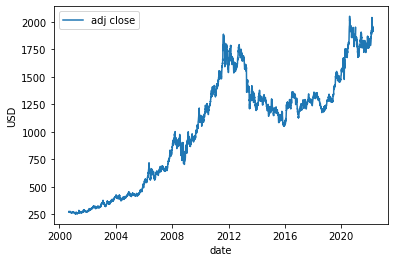

In [10]:
plt.plot(dataGold.index,dataGold['Adj Close'],label='adj close')
plt.xlabel('date')
plt.ylabel('USD')
plt.legend()
plt.show()

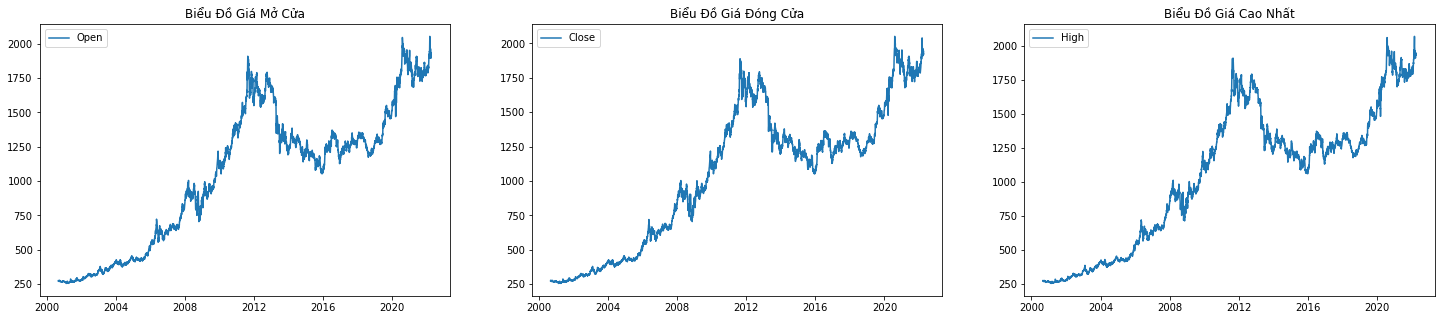

In [11]:
fig,(plt1,plt2,plt3)=plt.subplots(1,3,figsize=(25,5))
plt1.plot(dataGold.index,dataGold['Open'],label='Open')
plt2.plot(dataGold.index,dataGold['Close'],label='Close')
plt3.plot(dataGold.index,dataGold['High'],label='High')
plt1.set_title('Biểu Đồ Giá Mở Cửa')
plt2.set_title('Biểu Đồ Giá Đóng Cửa')
plt3.set_title('Biểu Đồ Giá Cao Nhất')
plt1.legend()
plt2.legend()
plt3.legend()
# plt.plot(dataGold.index,dataGold['Low'],label='Low')
# plt.plot(dataGold.index,dataGold['Close'],label='Close')
# plt.plot(dataGold.index,dataGold['Volume'],label='Volume')

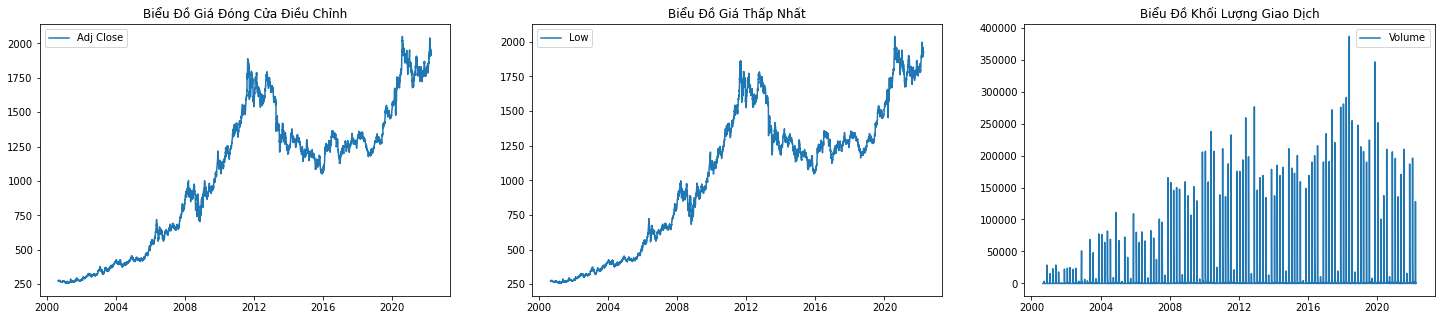

In [12]:
fig,(plt1,plt2,plt3)=plt.subplots(1,3,figsize=(25,5))
plt1.plot(dataGold.index,dataGold['Adj Close'],label='Adj Close')
plt2.plot(dataGold.index,dataGold['Low'],label='Low')
plt3.plot(dataGold.index,dataGold['Volume'],label='Volume')
plt1.set_title('Biểu Đồ Giá Đóng Cửa Điều Chỉnh')
plt2.set_title('Biểu Đồ Giá Thấp Nhất')
plt3.set_title('Biểu Đồ Khối Lượng Giao Dịch')
plt1.legend()
plt2.legend()
plt3.legend()
# plt.plot(dataGold.index,dataGold['Low'],label='Low')
# plt.plot(dataGold.index,dataGold['Close'],label='Close')
# plt.plot(dataGold.index,dataGold['Volume'],label='Volume')

In [13]:
dataSet=dataGold[['Open', 'High', 'Low', 'Close','Volume','Adj Close']].values

In [14]:
dataSet

array([[ 273.8999939 ,  273.8999939 ,  273.8999939 ,  273.8999939 ,
           0.        ,  273.8999939 ],
       [ 274.79998779,  278.29998779,  274.79998779,  278.29998779,
           0.        ,  278.29998779],
       [ 277.        ,  277.        ,  277.        ,  277.        ,
           0.        ,  277.        ],
       ...,
       [1916.69995117, 1931.80004883, 1916.69995117, 1918.40002441,
         138.        , 1918.40002441],
       [1919.5       , 1934.80004883, 1919.5       , 1933.80004883,
         311.        , 1933.80004883],
       [1928.80004883, 1947.69995117, 1928.80004883, 1941.59997559,
         153.        , 1941.59997559]])

In [15]:
dataSet.shape

(5422, 6)

In [16]:
def split_data(data,timestep):
    X,Y=list(),list()
    for i in range (len(data)):
        end=i+timestep
        if(end>len(data)):
            break
        datax=data[i:end,:-1]
        datay=data[end-1,-1]
        X.append(datax)
        Y.append(datay)
    return np.array(X),np.array(Y)

In [17]:
##chia du lieu thanh 80% train 20% test
def divDataIntoTrainAndTest(data):
    train,test=data[0:round(len(data)*0.8),:],data[round((len(data)*0.8)):,:]
    return train,test

In [18]:
dataTrain,dataTest=divDataIntoTrainAndTest(dataSet)

In [19]:
dataTrain.shape

(4338, 6)

In [20]:
dataTest.shape

(1084, 6)

In [21]:
dataTrain

array([[ 273.8999939 ,  273.8999939 ,  273.8999939 ,  273.8999939 ,
           0.        ,  273.8999939 ],
       [ 274.79998779,  278.29998779,  274.79998779,  278.29998779,
           0.        ,  278.29998779],
       [ 277.        ,  277.        ,  277.        ,  277.        ,
           0.        ,  277.        ],
       ...,
       [1252.90002441, 1257.69995117, 1250.30004883, 1253.80004883,
         139.        , 1253.80004883],
       [1253.09997559, 1260.30004883, 1253.09997559, 1254.30004883,
         578.        , 1254.30004883],
       [1256.19995117, 1262.40002441, 1255.69995117, 1262.19995117,
          45.        , 1262.19995117]])

In [22]:
dataTrain.shape

(4338, 6)

In [23]:
dataTest

array([[1261.09997559, 1264.30004883, 1259.5       , 1260.69995117,
         329.        , 1260.69995117],
       [1261.30004883, 1266.59997559, 1261.30004883, 1266.09997559,
          63.        , 1266.09997559],
       [1266.40002441, 1267.40002441, 1264.30004883, 1267.30004883,
         226.        , 1267.30004883],
       ...,
       [1916.69995117, 1931.80004883, 1916.69995117, 1918.40002441,
         138.        , 1918.40002441],
       [1919.5       , 1934.80004883, 1919.5       , 1933.80004883,
         311.        , 1933.80004883],
       [1928.80004883, 1947.69995117, 1928.80004883, 1941.59997559,
         153.        , 1941.59997559]])

In [24]:
dataTest.shape

(1084, 6)

In [25]:
dataTrainX,dataTrainY=split_data(dataTrain,2)
dataTestX,dataTestY=split_data(dataTest,2)

In [26]:
def print_Data(X,Y):
    print(X.shape,Y.shape)
    for i in range (len(X)):
        print(X[i],Y[i])
    

In [27]:
print_Data(dataTrainX,dataTrainY)

(4337, 2, 5) (4337,)
[[273.8999939  273.8999939  273.8999939  273.8999939    0.        ]
 [274.79998779 278.29998779 274.79998779 278.29998779   0.        ]] 278.29998779296875
[[274.79998779 278.29998779 274.79998779 278.29998779   0.        ]
 [277.         277.         277.         277.           0.        ]] 277.0
[[277.         277.         277.         277.           0.        ]
 [275.79998779 275.79998779 275.79998779 275.79998779   2.        ]] 275.79998779296875
[[275.79998779 275.79998779 275.79998779 275.79998779   2.        ]
 [274.20001221 274.20001221 274.20001221 274.20001221   0.        ]] 274.20001220703125
[[274.20001221 274.20001221 274.20001221 274.20001221   0.        ]
 [274.         274.         274.         274.         125.        ]] 274.0
[[274.         274.         274.         274.         125.        ]
 [273.29998779 273.29998779 273.29998779 273.29998779   0.        ]] 273.29998779296875
[[273.29998779 273.29998779 273.29998779 273.29998779   0.        ]
 

 [326.5        327.8999939  323.3999939  327.8999939  139.        ]] 327.8999938964844
[[326.5        327.8999939  323.3999939  327.8999939  139.        ]
 [325.6000061  326.         324.20001221 324.20001221  25.        ]] 324.20001220703125
[[325.6000061  326.         324.20001221 324.20001221  25.        ]
 [324.5        325.8999939  322.5        324.8999939  149.        ]] 324.8999938964844
[[324.5        325.8999939  322.5        324.8999939  149.        ]
 [325.5        325.79998779 323.5        325.79998779   0.        ]] 325.79998779296875
[[325.5        325.79998779 323.5        325.79998779   0.        ]
 [326.         328.29998779 326.         327.20001221  16.        ]] 327.20001220703125
[[326.         328.29998779 326.         327.20001221  16.        ]
 [329.70001221 333.5        329.5        333.5          0.        ]] 333.5
[[329.70001221 333.5        329.5        333.5          0.        ]
 [333.5        336.5        333.20001221 334.3999939   22.        ]] 334.399993

 [597.29998779 600.         597.29998779 597.5         38.        ]] 597.5
[[597.29998779 600.         597.29998779 597.5         38.        ]
 [596.5        597.5        592.         596.5        107.        ]] 596.5
[[ 596.5         597.5         592.          596.5         107.        ]
 [ 605.          616.5         605.          615.40002441 1125.        ]] 615.4000244140625
[[ 605.          616.5         605.          615.40002441 1125.        ]
 [ 614.59997559  620.5         614.59997559  620.          502.        ]] 620.0
[[614.59997559 620.5        614.59997559 620.         502.        ]
 [620.5        632.         620.5        632.59997559  99.        ]] 632.5999755859375
[[620.5        632.         620.5        632.59997559  99.        ]
 [640.         642.         611.         619.79998779 537.        ]] 619.7999877929688
[[640.         642.         611.         619.79998779 537.        ]
 [615.         637.         611.20001221 632.20001221 222.        ]] 632.2000122070312

 [1138.19995117 1138.19995117 1122.69995117 1138.19995117   54.        ]] 1138.199951171875
[[1138.19995117 1138.19995117 1122.69995117 1138.19995117   54.        ]
 [1150.69995117 1161.19995117 1143.         1150.69995117  177.        ]] 1150.699951171875
[[1150.69995117 1161.19995117 1143.         1150.69995117  177.        ]
 [1128.90002441 1157.19995117 1127.19995117 1128.90002441   51.        ]] 1128.9000244140625
[[1128.90002441 1157.19995117 1127.19995117 1128.90002441   51.        ]
 [1136.40002441 1136.40002441 1121.         1136.40002441   58.        ]] 1136.4000244140625
[[1136.40002441 1136.40002441 1121.         1136.40002441   58.        ]
 [1137.         1145.90002441 1132.80004883 1142.59997559   81.        ]] 1142.5999755859375
[[1137.         1145.90002441 1132.80004883 1142.59997559   81.        ]
 [1132.80004883 1133.40002441 1127.19995117 1130.09997559   50.        ]] 1130.0999755859375
[[1132.80004883 1133.40002441 1127.19995117 1130.09997559   50.        ]
 [1139

 [1909.         1909.30004883 1824.59997559 1858.30004883  458.        ]] 1858.300048828125
[[1909.         1909.30004883 1824.59997559 1858.30004883  458.        ]
 [1833.         1853.09997559 1753.09997559 1754.09997559  992.        ]] 1754.0999755859375
[[1833.         1853.09997559 1753.09997559 1754.09997559  992.        ]
 [1748.40002441 1772.5        1707.30004883 1759.80004883  864.        ]] 1759.800048828125
[[1748.40002441 1772.5        1707.30004883 1759.80004883  864.        ]
 [1768.5        1829.30004883 1768.5        1794.09997559  270.        ]] 1794.0999755859375
[[1768.5        1829.30004883 1768.5        1794.09997559  270.        ]
 [1817.90002441 1817.90002441 1786.69995117 1788.40002441  828.        ]] 1788.4000244140625
[[1817.90002441 1817.90002441 1786.69995117 1788.40002441  828.        ]
 [1787.19995117 1839.59997559 1783.09997559 1826.69995117  598.        ]] 1826.699951171875
[[1787.19995117 1839.59997559 1783.09997559 1826.69995117  598.        ]
 [1830.

 [1366.80004883 1374.5        1366.5        1372.19995117   23.        ]] 1372.199951171875
[[1366.80004883 1374.5        1366.5        1372.19995117   23.        ]
 [1376.09997559 1386.59997559 1371.09997559 1379.           91.        ]] 1379.0
[[1376.09997559 1386.59997559 1371.09997559 1379.           91.        ]
 [1386.09997559 1391.40002441 1372.19995117 1372.90002441   29.        ]] 1372.9000244140625
[[1386.09997559 1391.40002441 1372.19995117 1372.90002441   29.        ]
 [1359.30004883 1361.80004883 1353.40002441 1359.           35.        ]] 1359.0
[[1359.30004883 1361.80004883 1353.40002441 1359.           35.        ]
 [1357.09997559 1358.         1332.69995117 1341.40002441   57.        ]] 1341.4000244140625
[[1357.09997559 1358.         1332.69995117 1341.40002441   57.        ]
 [1333.69995117 1333.69995117 1325.80004883 1330.5          72.        ]] 1330.5
[[1333.69995117 1333.69995117 1325.80004883 1330.5          72.        ]
 [1339.09997559 1339.09997559 1335.800048

 [1293.90002441 1293.90002441 1266.30004883 1270.5         134.        ]] 1270.5
[[1293.90002441 1293.90002441 1266.30004883 1270.5         134.        ]
 [1267.         1269.19995117 1264.90002441 1268.           53.        ]] 1268.0
[[1267.         1269.19995117 1264.90002441 1268.           53.        ]
 [1263.40002441 1270.5        1255.19995117 1261.19995117  218.        ]] 1261.199951171875
[[1263.40002441 1270.5        1255.19995117 1261.19995117  218.        ]
 [1253.69995117 1355.59997559 1253.69995117 1320.          694.        ]] 1320.0
[[1253.69995117 1355.59997559 1253.69995117 1320.          694.        ]
 [1330.         1331.69995117 1320.         1322.5          92.        ]] 1322.5
[[1330.         1331.69995117 1320.         1322.5          92.        ]
 [1314.80004883 1315.59997559 1314.09997559 1315.30004883 1072.        ]] 1315.300048828125
[[1314.80004883 1315.59997559 1314.09997559 1315.30004883 1072.        ]
 [1311.59997559 1327.40002441 1311.59997559 1323.90002

In [28]:
print_Data(dataTestX,dataTestY)

(1083, 2, 5) (1083,)
[[1261.09997559 1264.30004883 1259.5        1260.69995117  329.        ]
 [1261.30004883 1266.59997559 1261.30004883 1266.09997559   63.        ]] 1266.0999755859375
[[1261.30004883 1266.59997559 1261.30004883 1266.09997559   63.        ]
 [1266.40002441 1267.40002441 1264.30004883 1267.30004883  226.        ]] 1267.300048828125
[[1266.40002441 1267.40002441 1264.30004883 1267.30004883  226.        ]
 [1266.30004883 1276.30004883 1266.30004883 1275.40002441  119.        ]] 1275.4000244140625
[[1266.30004883 1276.30004883 1266.30004883 1275.40002441  119.        ]
 [1282.40002441 1284.09997559 1281.80004883 1284.09997559   84.        ]] 1284.0999755859375
[[1282.40002441 1284.09997559 1281.80004883 1284.09997559   84.        ]
 [1284.         1287.         1284.         1287.          456.        ]] 1287.0
[[1284.         1287.         1284.         1287.          456.        ]
 [1288.19995117 1294.09997559 1288.19995117 1294.09997559  245.        ]] 1294.0999755859

 [1726.30004883 1726.30004883 1684.5        1697.80004883 2755.        ]] 1697.800048828125
[[1726.30004883 1726.30004883 1684.5        1697.80004883 2755.        ]
 [1694.5        1718.90002441 1694.5        1718.90002441  807.        ]] 1718.9000244140625
[[1694.5        1718.90002441 1694.5        1718.90002441  807.        ]
 [1711.80004883 1711.80004883 1668.59997559 1676.19995117 1502.        ]] 1676.199951171875
[[1711.80004883 1711.80004883 1668.59997559 1676.19995117 1502.        ]
 [1679.09997559 1699.40002441 1675.90002441 1698.30004883  587.        ]] 1698.300048828125
[[1679.09997559 1699.40002441 1675.90002441 1698.30004883  587.        ]
 [1694.59997559 1720.90002441 1692.         1714.69995117  690.        ]] 1714.699951171875
[[1694.59997559 1720.90002441 1692.         1714.69995117  690.        ]
 [1716.09997559 1740.80004883 1711.90002441 1713.30004883  718.        ]] 1713.300048828125
[[1716.09997559 1740.80004883 1711.90002441 1713.30004883  718.        ]
 [1737.19

In [29]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [30]:
dataTrainX

array([[[ 273.8999939 ,  273.8999939 ,  273.8999939 ,  273.8999939 ,
            0.        ],
        [ 274.79998779,  278.29998779,  274.79998779,  278.29998779,
            0.        ]],

       [[ 274.79998779,  278.29998779,  274.79998779,  278.29998779,
            0.        ],
        [ 277.        ,  277.        ,  277.        ,  277.        ,
            0.        ]],

       [[ 277.        ,  277.        ,  277.        ,  277.        ,
            0.        ],
        [ 275.79998779,  275.79998779,  275.79998779,  275.79998779,
            2.        ]],

       ...,

       [[1241.90002441, 1254.5       , 1239.80004883, 1245.40002441,
          349.        ],
        [1252.90002441, 1257.69995117, 1250.30004883, 1253.80004883,
          139.        ]],

       [[1252.90002441, 1257.69995117, 1250.30004883, 1253.80004883,
          139.        ],
        [1253.09997559, 1260.30004883, 1253.09997559, 1254.30004883,
          578.        ]],

       [[1253.09997559, 1260.30004883

In [32]:
dataTrainY

array([ 278.29998779,  277.        ,  275.79998779, ..., 1253.80004883,
       1254.30004883, 1262.19995117])

#### MÔ HÌNH LSTM VỚI KÍCH THỨC TẦNG ẨN LÀ 16, HÀM KÍCH HOẠT RELU

In [33]:
modelLSTMRL=Sequential()
modelLSTMRL.add(LSTM(16,activation='relu',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMRL.add(Dense(1))
modelLSTMRL.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelRL=modelLSTMRL.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)


Epoch 1/200
136/136 - 2s - loss: 2509026.0000
Epoch 2/200
136/136 - 0s - loss: 659071.3750
Epoch 3/200
136/136 - 0s - loss: 604736.2500
Epoch 4/200
136/136 - 0s - loss: 238790.6562
Epoch 5/200
136/136 - 0s - loss: 130977.3359
Epoch 6/200
136/136 - 0s - loss: 126906.3516
Epoch 7/200
136/136 - 0s - loss: 140750.2812
Epoch 8/200
136/136 - 0s - loss: 248387.2031
Epoch 9/200
136/136 - 0s - loss: 38560.1211
Epoch 10/200
136/136 - 0s - loss: 20245.2559
Epoch 11/200
136/136 - 0s - loss: 17823.2598
Epoch 12/200
136/136 - 0s - loss: 16249.3115
Epoch 13/200
136/136 - 0s - loss: 15235.2148
Epoch 14/200
136/136 - 0s - loss: 14713.3135
Epoch 15/200
136/136 - 0s - loss: 14485.6797
Epoch 16/200
136/136 - 0s - loss: 17821.6270
Epoch 17/200
136/136 - 0s - loss: 12897.8379
Epoch 18/200
136/136 - 0s - loss: 6226.7104
Epoch 19/200
136/136 - 0s - loss: 5111.1362
Epoch 20/200
136/136 - 0s - loss: 2710.3523
Epoch 21/200
136/136 - 0s - loss: 1867.2822
Epoch 22/200
136/136 - 0s - loss: 1419.7679
Epoch 23/200
13

Epoch 190/200
136/136 - 0s - loss: 61.4263
Epoch 191/200
136/136 - 0s - loss: 60.7142
Epoch 192/200
136/136 - 0s - loss: 71.1052
Epoch 193/200
136/136 - 0s - loss: 63.3517
Epoch 194/200
136/136 - 0s - loss: 55.2610
Epoch 195/200
136/136 - 0s - loss: 69.9999
Epoch 196/200
136/136 - 0s - loss: 90.0251
Epoch 197/200
136/136 - 0s - loss: 68.7644
Epoch 198/200
136/136 - 0s - loss: 51.2505
Epoch 199/200
136/136 - 0s - loss: 63.7361
Epoch 200/200
136/136 - 0s - loss: 118.7093


In [34]:
modelPredictRL=modelLSTMRL.predict(dataTestX,verbose=2)

34/34 - 0s


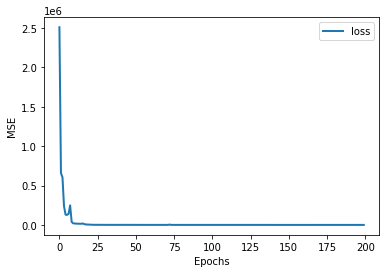

In [35]:
plt.plot(modelRL.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

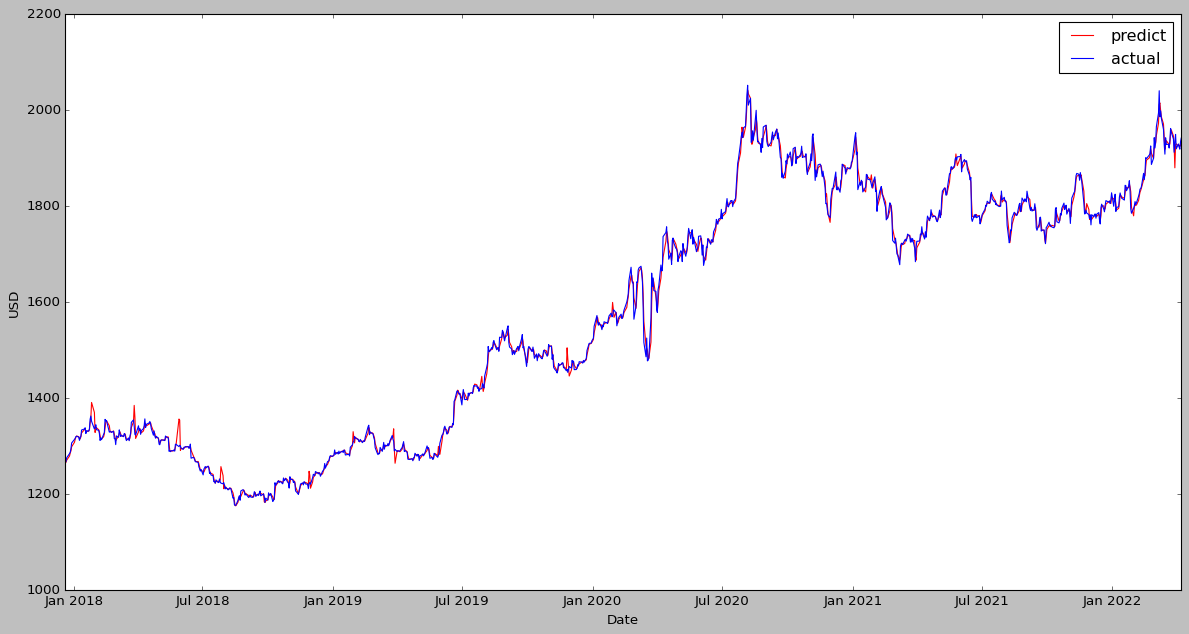

In [37]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictRL,label='predict',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [80]:
mape= mean_absolute_percentage_error(dataTestY, modelPredictRL)
print("MAPE:",mape)
meanSquaredError=mean_squared_error(dataTestY, modelPredictRL)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MAPE: 0.0042450784674144875
MSE: 109.84728633164534
RMSE: 10.480805614629313


### MÔ HÌNH LSTM VỚI KÍCH THỨC TẦNG ẨN LÀ 16, HÀM KÍCH HOẠT TANH

In [39]:
##Test thử mô hình với tham số Hidden Layer=16
modelLSTMT=Sequential()
modelLSTMT.add(LSTM(16,activation='tanh',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMT.add(Dense(1))
modelLSTMT.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelT=modelLSTMT.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)


Epoch 1/200
136/136 - 3s - loss: 1049186.7500
Epoch 2/200
136/136 - 0s - loss: 1046153.7500
Epoch 3/200
136/136 - 0s - loss: 1043093.6875
Epoch 4/200
136/136 - 0s - loss: 1040888.9375
Epoch 5/200
136/136 - 0s - loss: 1039005.1250
Epoch 6/200
136/136 - 0s - loss: 1037167.2500
Epoch 7/200
136/136 - 0s - loss: 1035349.5000
Epoch 8/200
136/136 - 0s - loss: 1033185.5625
Epoch 9/200
136/136 - 0s - loss: 1031352.3750
Epoch 10/200
136/136 - 0s - loss: 1029091.5625
Epoch 11/200
136/136 - 0s - loss: 1027135.6250
Epoch 12/200
136/136 - 0s - loss: 1025269.3125
Epoch 13/200
136/136 - 0s - loss: 1023424.7500
Epoch 14/200
136/136 - 0s - loss: 1021610.5000
Epoch 15/200
136/136 - 0s - loss: 1019806.7500
Epoch 16/200
136/136 - 0s - loss: 1018008.7500
Epoch 17/200
136/136 - 0s - loss: 1016216.9375
Epoch 18/200
136/136 - 0s - loss: 1014442.5000
Epoch 19/200
136/136 - 0s - loss: 1012673.8125
Epoch 20/200
136/136 - 0s - loss: 1010910.8750
Epoch 21/200
136/136 - 0s - loss: 1009145.2500
Epoch 22/200
136/136 -

136/136 - 0s - loss: 753322.2500
Epoch 178/200
136/136 - 0s - loss: 751856.1250
Epoch 179/200
136/136 - 0s - loss: 750390.9375
Epoch 180/200
136/136 - 0s - loss: 748928.8125
Epoch 181/200
136/136 - 0s - loss: 747467.9375
Epoch 182/200
136/136 - 0s - loss: 746008.5000
Epoch 183/200
136/136 - 0s - loss: 744550.8125
Epoch 184/200
136/136 - 0s - loss: 743096.0625
Epoch 185/200
136/136 - 0s - loss: 741645.0000
Epoch 186/200
136/136 - 0s - loss: 740194.2500
Epoch 187/200
136/136 - 0s - loss: 738745.9375
Epoch 188/200
136/136 - 0s - loss: 737299.3125
Epoch 189/200
136/136 - 0s - loss: 735854.6250
Epoch 190/200
136/136 - 0s - loss: 734412.7500
Epoch 191/200
136/136 - 0s - loss: 732974.8750
Epoch 192/200
136/136 - 0s - loss: 731537.1875
Epoch 193/200
136/136 - 0s - loss: 730101.8750
Epoch 194/200
136/136 - 0s - loss: 728668.1250
Epoch 195/200
136/136 - 0s - loss: 727235.3750
Epoch 196/200
136/136 - 0s - loss: 725804.6250
Epoch 197/200
136/136 - 0s - loss: 724376.9375
Epoch 198/200
136/136 - 0s 

In [40]:
modelPredictT=modelLSTMT.predict(dataTestX,verbose=2)

34/34 - 1s


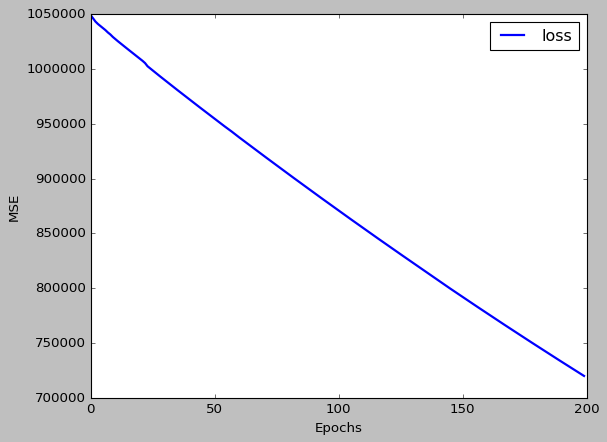

In [41]:
plt.plot(modelT.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

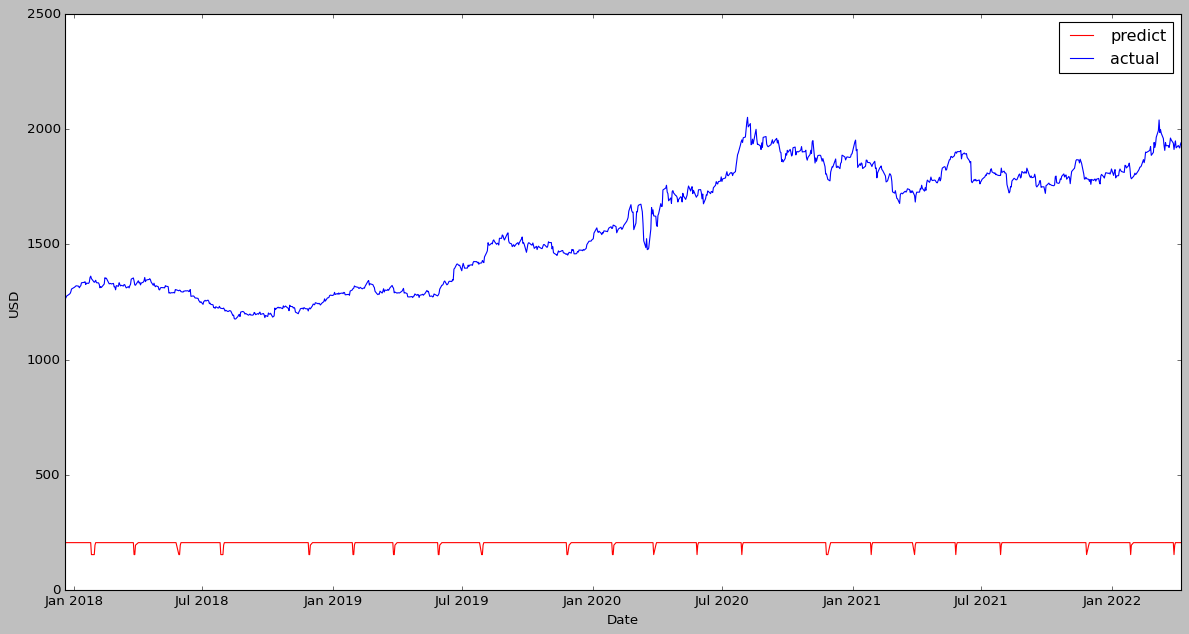

In [42]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictT,label='predict',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [81]:
mape1= mean_absolute_percentage_error(dataTestY, modelPredictT)
print("MAPE:",mape1)
meanSquaredError1=mean_squared_error(dataTestY, modelPredictT)
print("MSE:", meanSquaredError1)
rootMeanSquaredError1 = sqrt(meanSquaredError1)
print("RMSE:", rootMeanSquaredError1)

MAPE: 0.8673532117216208
MSE: 1951639.2560943866
RMSE: 1397.010828910924


### MÔ HÌNH LSTM VỚI KÍCH THỨC TẦNG ẨN LÀ 32, HÀM KÍCH HOẠT RELU¶

In [44]:
##Test thử mô hình với tham số Hidden Layer=32
modelLSTMRL32=Sequential()
modelLSTMRL32.add(LSTM(32,activation='relu',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMRL32.add(Dense(1))
modelLSTMRL32.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelRL32=modelLSTMRL32.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)

Epoch 1/200
136/136 - 2s - loss: 1478895.3750
Epoch 2/200
136/136 - 0s - loss: 49895.7500
Epoch 3/200
136/136 - 0s - loss: 13565.3359
Epoch 4/200
136/136 - 0s - loss: 9724.9336
Epoch 5/200
136/136 - 0s - loss: 11813.5137
Epoch 6/200
136/136 - 0s - loss: 6333.5562
Epoch 7/200
136/136 - 0s - loss: 5463.1846
Epoch 8/200
136/136 - 0s - loss: 4361.9668
Epoch 9/200
136/136 - 0s - loss: 2989.3381
Epoch 10/200
136/136 - 0s - loss: 3205.3923
Epoch 11/200
136/136 - 0s - loss: 2394.6785
Epoch 12/200
136/136 - 0s - loss: 4921.2944
Epoch 13/200
136/136 - 0s - loss: 8416.2012
Epoch 14/200
136/136 - 0s - loss: 4257.1860
Epoch 15/200
136/136 - 0s - loss: 2991.0032
Epoch 16/200
136/136 - 0s - loss: 2207.2729
Epoch 17/200
136/136 - 0s - loss: 2226.5168
Epoch 18/200
136/136 - 0s - loss: 1830.7283
Epoch 19/200
136/136 - 0s - loss: 1811.3475
Epoch 20/200
136/136 - 0s - loss: 1598.8379
Epoch 21/200
136/136 - 0s - loss: 1515.9691
Epoch 22/200
136/136 - 0s - loss: 1261.2195
Epoch 23/200
136/136 - 0s - loss: 8

Epoch 189/200
136/136 - 0s - loss: 649.0583
Epoch 190/200
136/136 - 0s - loss: 580.6085
Epoch 191/200
136/136 - 0s - loss: 390.3480
Epoch 192/200
136/136 - 0s - loss: 296.9253
Epoch 193/200
136/136 - 0s - loss: 1310.1967
Epoch 194/200
136/136 - 0s - loss: 555.3842
Epoch 195/200
136/136 - 0s - loss: 528.2792
Epoch 196/200
136/136 - 0s - loss: 439.6134
Epoch 197/200
136/136 - 0s - loss: 369.0725
Epoch 198/200
136/136 - 0s - loss: 766.3420
Epoch 199/200
136/136 - 0s - loss: 686.7089
Epoch 200/200
136/136 - 0s - loss: 579.8664


In [45]:
modelPredictRL32=modelLSTMRL32.predict(dataTestX,verbose=2)

34/34 - 0s


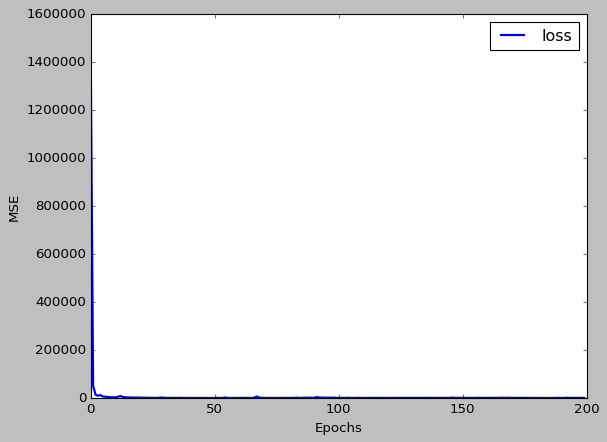

In [46]:
plt.plot(modelRL32.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

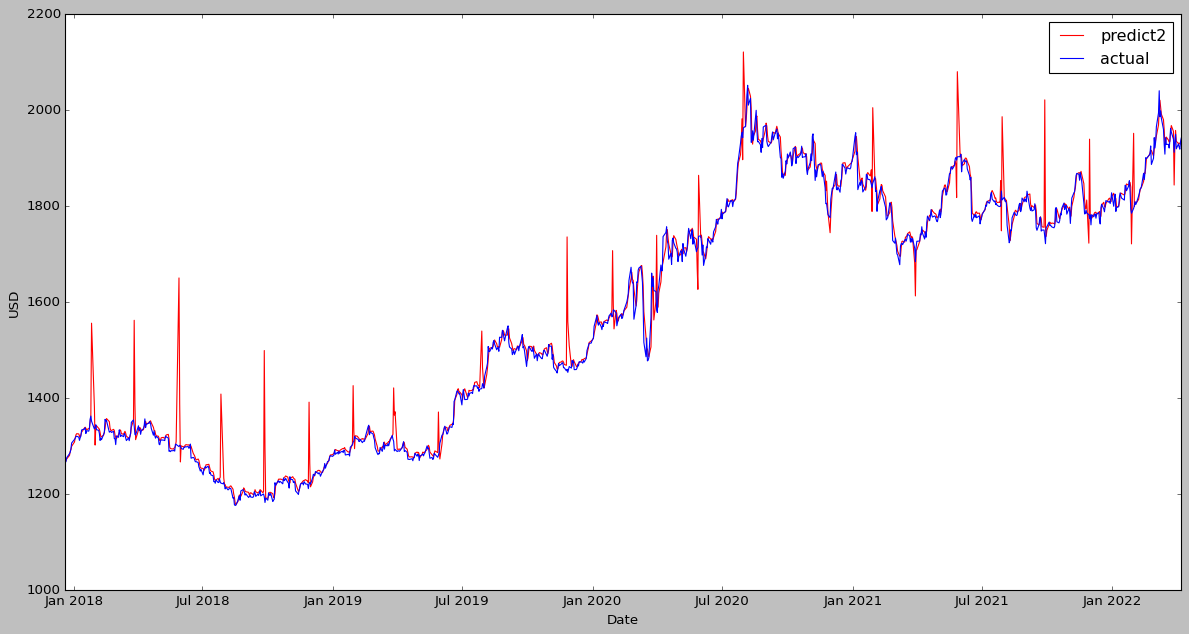

In [47]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictRL32,label='predict2',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [88]:
mape2= mean_absolute_percentage_error(dataTestY, modelPredictRL32)
print("MAPE:",mape2)
meanSquaredError2=mean_squared_error(dataTestY, modelPredictRL32)
print("MSE:", meanSquaredError2)
rootMeanSquaredError2 = sqrt(meanSquaredError2)
print("RMSE:", rootMeanSquaredError2)

MAPE: 0.008978729774685168
MSE: 1017.2648795901875
RMSE: 31.89459013046237


### TẦNG ẨN 32 HÀM KÍCH HOẠT TANH

In [49]:
modelLSTMT32=Sequential()
modelLSTMT32.add(LSTM(32,activation='tanh',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMT32.add(Dense(1))
modelLSTMT32.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelT32=modelLSTMT32.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)

Epoch 1/200
136/136 - 3s - loss: 1046855.8125
Epoch 2/200
136/136 - 0s - loss: 1040894.1250
Epoch 3/200
136/136 - 0s - loss: 1036332.7500
Epoch 4/200
136/136 - 0s - loss: 1031892.0000
Epoch 5/200
136/136 - 0s - loss: 1027841.8125
Epoch 6/200
136/136 - 0s - loss: 1023887.2500
Epoch 7/200
136/136 - 0s - loss: 1020030.4375
Epoch 8/200
136/136 - 0s - loss: 1015906.3125
Epoch 9/200
136/136 - 0s - loss: 1011348.0625
Epoch 10/200
136/136 - 0s - loss: 1007173.3125
Epoch 11/200
136/136 - 0s - loss: 1003090.8750
Epoch 12/200
136/136 - 0s - loss: 999005.2500
Epoch 13/200
136/136 - 0s - loss: 994969.8125
Epoch 14/200
136/136 - 0s - loss: 989008.9375
Epoch 15/200
136/136 - 0s - loss: 984354.8125
Epoch 16/200
136/136 - 0s - loss: 979660.1875
Epoch 17/200
136/136 - 0s - loss: 973971.5625
Epoch 18/200
136/136 - 0s - loss: 969489.4375
Epoch 19/200
136/136 - 0s - loss: 965168.3750
Epoch 20/200
136/136 - 0s - loss: 960930.6875
Epoch 21/200
136/136 - 0s - loss: 956741.5625
Epoch 22/200
136/136 - 0s - loss

Epoch 178/200
136/136 - 0s - loss: 457260.8750
Epoch 179/200
136/136 - 0s - loss: 454988.5312
Epoch 180/200
136/136 - 0s - loss: 452728.3750
Epoch 181/200
136/136 - 0s - loss: 450475.9688
Epoch 182/200
136/136 - 0s - loss: 448237.5625
Epoch 183/200
136/136 - 0s - loss: 446009.7188
Epoch 184/200
136/136 - 0s - loss: 443792.7188
Epoch 185/200
136/136 - 0s - loss: 441585.0938
Epoch 186/200
136/136 - 0s - loss: 439389.1562
Epoch 187/200
136/136 - 0s - loss: 437202.3125
Epoch 188/200
136/136 - 0s - loss: 435030.9375
Epoch 189/200
136/136 - 0s - loss: 432867.3125
Epoch 190/200
136/136 - 0s - loss: 430715.3125
Epoch 191/200
136/136 - 0s - loss: 428575.3438
Epoch 192/200
136/136 - 0s - loss: 426447.1250
Epoch 193/200
136/136 - 0s - loss: 424328.0938
Epoch 194/200
136/136 - 0s - loss: 422225.5000
Epoch 195/200
136/136 - 0s - loss: 420129.0312
Epoch 196/200
136/136 - 0s - loss: 418044.5625
Epoch 197/200
136/136 - 0s - loss: 415972.3438
Epoch 198/200
136/136 - 0s - loss: 413912.1562
Epoch 199/200

In [50]:
modelPredictT32=modelLSTMT32.predict(dataTestX,verbose=2)

34/34 - 0s


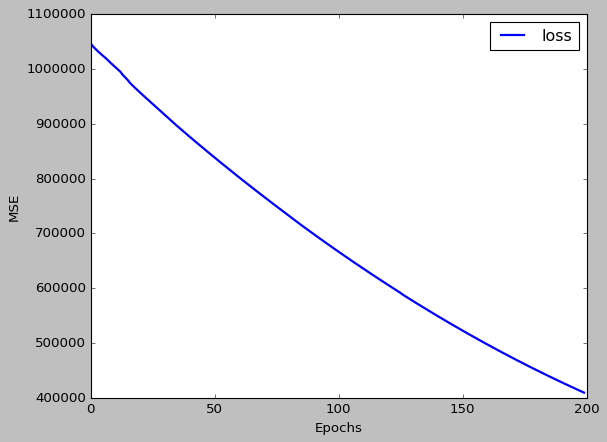

In [51]:
plt.plot(modelT32.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

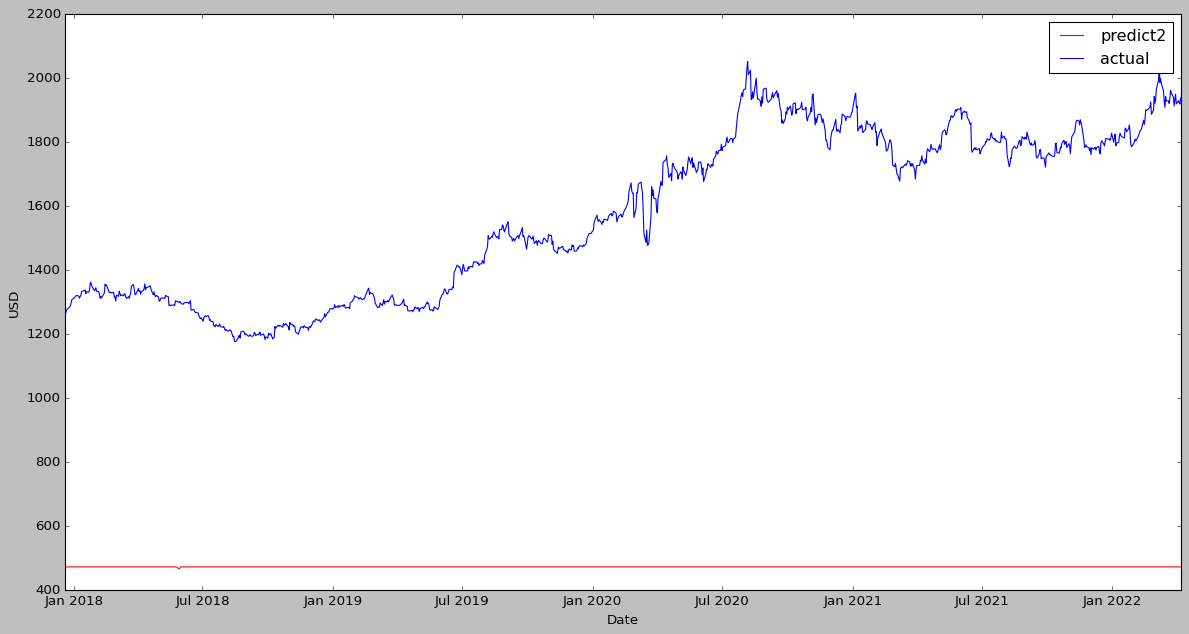

In [52]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictT32,label='predict2',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [53]:
mape2= mean_absolute_percentage_error(dataTestY, modelPredictT32)
print("MAPE:",mape2*100)
meanSquaredError2=mean_squared_error(dataTestY, modelPredictT32)
print("MSE:", meanSquaredError2)
rootMeanSquaredError2 = sqrt(meanSquaredError2)
print("RMSE:", rootMeanSquaredError2)

MAPE: 69.24731123902936
MSE: 1286373.897424383
RMSE: 1134.184243156456


### TẦNG ẨN 62 HÀM KÍCH HOẠT TANH

In [64]:
modelLSTMT62_=Sequential()
modelLSTMT62_.add(LSTM(62,activation='tanh',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMT62_.add(Dense(1))
modelLSTMT62_.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelT62_=modelLSTMT62_.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)

Epoch 1/200
136/136 - 2s - loss: 1042500.0000
Epoch 2/200
136/136 - 0s - loss: 1032274.8750
Epoch 3/200
136/136 - 0s - loss: 1022725.8125
Epoch 4/200
136/136 - 0s - loss: 1014302.4375
Epoch 5/200
136/136 - 0s - loss: 1005984.6250
Epoch 6/200
136/136 - 0s - loss: 997306.3750
Epoch 7/200
136/136 - 0s - loss: 989051.5625
Epoch 8/200
136/136 - 0s - loss: 981228.6875
Epoch 9/200
136/136 - 0s - loss: 973551.4375
Epoch 10/200
136/136 - 0s - loss: 966096.1250
Epoch 11/200
136/136 - 0s - loss: 958697.1875
Epoch 12/200
136/136 - 0s - loss: 951182.5625
Epoch 13/200
136/136 - 0s - loss: 943825.6875
Epoch 14/200
136/136 - 0s - loss: 935895.9375
Epoch 15/200
136/136 - 0s - loss: 928100.8125
Epoch 16/200
136/136 - 0s - loss: 920604.5000
Epoch 17/200
136/136 - 0s - loss: 913231.3125
Epoch 18/200
136/136 - 0s - loss: 905911.7500
Epoch 19/200
136/136 - 0s - loss: 898698.3125
Epoch 20/200
136/136 - 0s - loss: 891551.8125
Epoch 21/200
136/136 - 0s - loss: 884363.4375
Epoch 22/200
136/136 - 0s - loss: 8772

Epoch 178/200
136/136 - 0s - loss: 241753.9531
Epoch 179/200
136/136 - 0s - loss: 240542.3125
Epoch 180/200
136/136 - 0s - loss: 239364.2812
Epoch 181/200
136/136 - 0s - loss: 238217.7344
Epoch 182/200
136/136 - 0s - loss: 237097.7656
Epoch 183/200
136/136 - 0s - loss: 236010.2188
Epoch 184/200
136/136 - 0s - loss: 234950.5000
Epoch 185/200
136/136 - 0s - loss: 233925.0781
Epoch 186/200
136/136 - 0s - loss: 232924.2344
Epoch 187/200
136/136 - 0s - loss: 231961.9062
Epoch 188/200
136/136 - 0s - loss: 231025.7969
Epoch 189/200
136/136 - 0s - loss: 230118.0000
Epoch 190/200
136/136 - 0s - loss: 229241.2188
Epoch 191/200
136/136 - 0s - loss: 228398.0000
Epoch 192/200
136/136 - 0s - loss: 227584.0312
Epoch 193/200
136/136 - 0s - loss: 226791.5938
Epoch 194/200
136/136 - 0s - loss: 226030.9219
Epoch 195/200
136/136 - 0s - loss: 225303.4375
Epoch 196/200
136/136 - 0s - loss: 224603.2031
Epoch 197/200
136/136 - 0s - loss: 223927.3594
Epoch 198/200
136/136 - 0s - loss: 223276.6562
Epoch 199/200

In [65]:
modelPredictT62_=modelLSTMT62_.predict(dataTestX,verbose=2)

34/34 - 1s


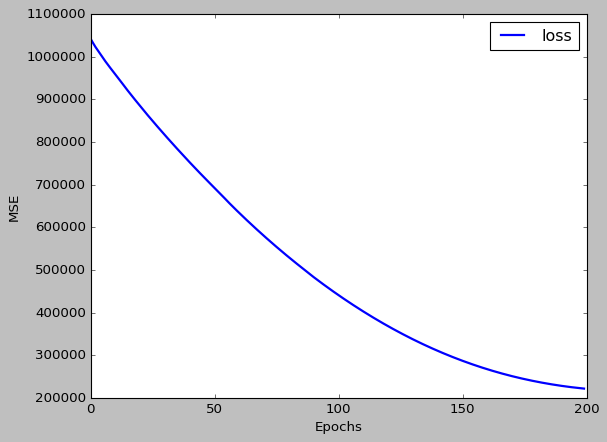

In [66]:
plt.plot(modelT62_.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

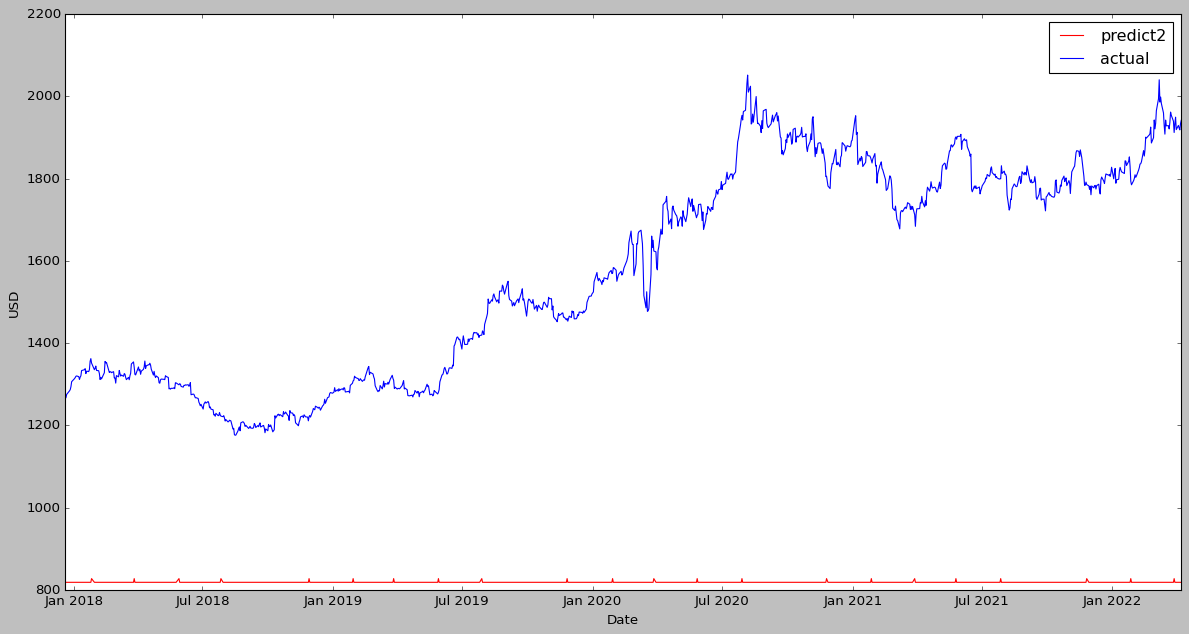

In [86]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictT62_,label='predict2',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [87]:
mape2= mean_absolute_percentage_error(dataTestY, modelPredictT62_)
print("MAPE:",mape2)
meanSquaredError2=mean_squared_error(dataTestY, modelPredictT62_)
print("MSE:", meanSquaredError2)
rootMeanSquaredError2 = sqrt(meanSquaredError2)
print("RMSE:", rootMeanSquaredError2)

MAPE: 0.46665948281382463
MSE: 640210.7245420851
RMSE: 800.1316919995639


### TẦNG ẨN 62 HÀM KÍCH HOẠT RELU

In [69]:
modelLSTMRL62_=Sequential()
modelLSTMRL62_.add(LSTM(62,activation='relu',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
modelLSTMRL62_.add(Dense(1))
modelLSTMRL62_.compile(optimizer='adam',loss='mse')
# modelLSTM.add(Dropout(0.2))
modelRL62_=modelLSTMRL62_.fit(dataTrainX,dataTrainY,epochs=200,verbose=2)

Epoch 1/200
136/136 - 2s - loss: 144271.2656
Epoch 2/200
136/136 - 0s - loss: 28179.3398
Epoch 3/200
136/136 - 0s - loss: 24400.7461
Epoch 4/200
136/136 - 0s - loss: 12116.5820
Epoch 5/200
136/136 - 0s - loss: 6686.2915
Epoch 6/200
136/136 - 0s - loss: 21695.6191
Epoch 7/200
136/136 - 0s - loss: 17683.6738
Epoch 8/200
136/136 - 0s - loss: 5757.4229
Epoch 9/200
136/136 - 0s - loss: 2522.1172
Epoch 10/200
136/136 - 0s - loss: 2962.9407
Epoch 11/200
136/136 - 0s - loss: 1795.2714
Epoch 12/200
136/136 - 0s - loss: 2296.8289
Epoch 13/200
136/136 - 0s - loss: 2078.7798
Epoch 14/200
136/136 - 0s - loss: 1120.9304
Epoch 15/200
136/136 - 0s - loss: 1180.6245
Epoch 16/200
136/136 - 0s - loss: 1717.5814
Epoch 17/200
136/136 - 0s - loss: 1711.2037
Epoch 18/200
136/136 - 0s - loss: 1229.7395
Epoch 19/200
136/136 - 0s - loss: 1347.0062
Epoch 20/200
136/136 - 0s - loss: 911.0404
Epoch 21/200
136/136 - 0s - loss: 869.3340
Epoch 22/200
136/136 - 0s - loss: 725.1140
Epoch 23/200
136/136 - 0s - loss: 668

Epoch 191/200
136/136 - 0s - loss: 919.4070
Epoch 192/200
136/136 - 0s - loss: 120.7877
Epoch 193/200
136/136 - 0s - loss: 27.5573
Epoch 194/200
136/136 - 0s - loss: 30.8597
Epoch 195/200
136/136 - 0s - loss: 29.4927
Epoch 196/200
136/136 - 0s - loss: 28.5150
Epoch 197/200
136/136 - 0s - loss: 28.3239
Epoch 198/200
136/136 - 0s - loss: 26.6672
Epoch 199/200
136/136 - 0s - loss: 48.8456
Epoch 200/200
136/136 - 0s - loss: 43.5368


In [70]:
modelPredictRL62_=modelLSTMRL62_.predict(dataTestX,verbose=2)

34/34 - 0s


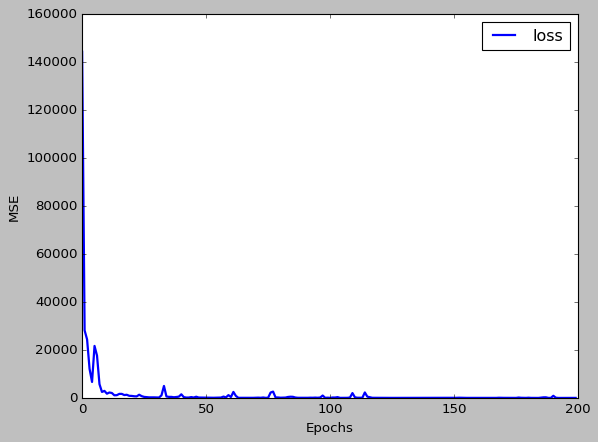

In [71]:
plt.plot(modelRL62_.history['loss'],label='loss',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

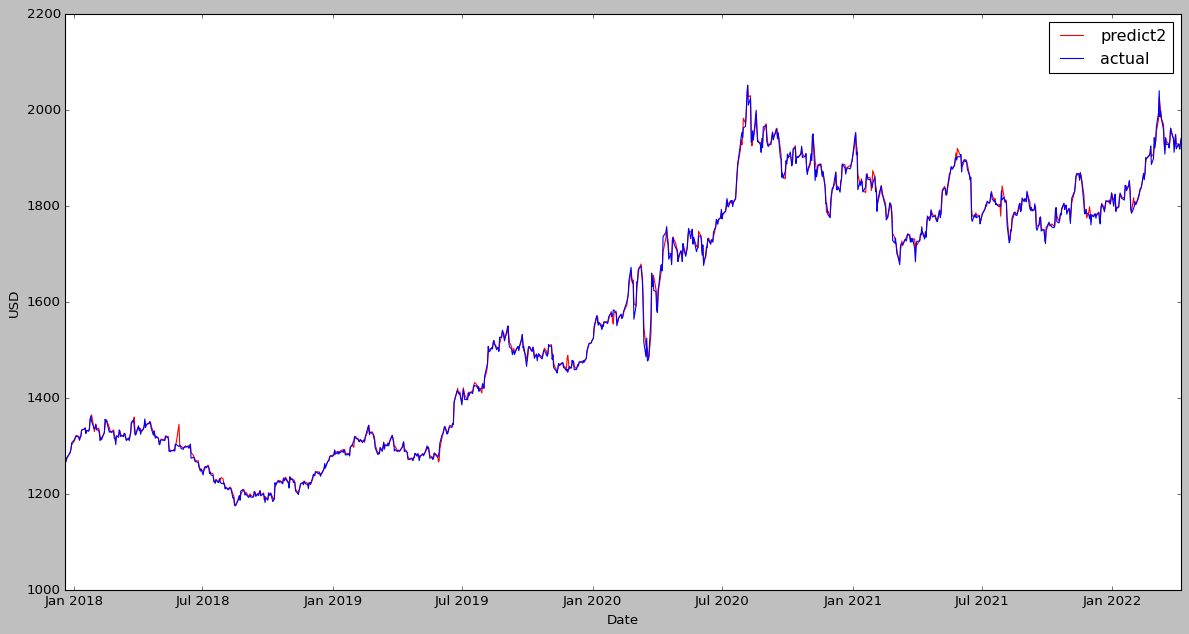

In [84]:
plt.style.use('classic')
plt.figure(figsize=(18,9))
plt.plot(dateTest[1:],modelPredictRL62_,label='predict2',markersize=12,linewidth=1,color='red')
plt.plot(dateTest[1:],dataTestY,label='actual',markersize=12,linewidth=1)
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

In [85]:
mape2= mean_absolute_percentage_error(dataTestY, modelPredictRL62_)
print("MAPE:",mape2)
meanSquaredError2=mean_squared_error(dataTestY, modelPredictRL62_)
print("MSE:", meanSquaredError2)
rootMeanSquaredError2 = sqrt(meanSquaredError2)
print("RMSE:", rootMeanSquaredError2)

MAPE: 0.0028992903134635968
MSE: 50.50217505879459
RMSE: 7.106488236730895


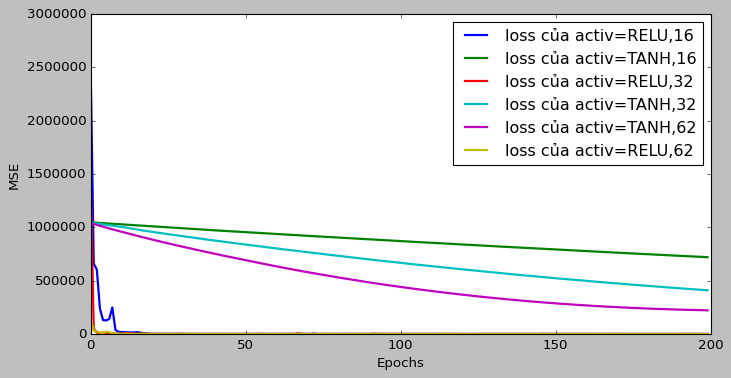

In [79]:
##Hàm LOSS CỦA TẤT CẢ MÔ HÌNH
plt.figure(figsize=(10,5))
plt.plot(modelRL.history['loss'],label='loss của activ=RELU,16',linewidth=2.0)
plt.plot(modelT.history['loss'],label='loss của activ=TANH,16',linewidth=2.0)
plt.plot(modelRL32.history['loss'],label='loss của activ=RELU,32',linewidth=2.0)
plt.plot(modelT32.history['loss'],label='loss của activ=TANH,32',linewidth=2.0)
plt.plot(modelT62_.history['loss'],label='loss của activ=TANH,62',linewidth=2.0)
plt.plot(modelRL62_.history['loss'],label='loss của activ=RELU,62',linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# mape= mean_absolute_percentage_error(dataTestY, modelPredict)
# print("MAPE:",mape*100)
# meanSquaredError=mean_squared_error(dataTestY, modelPredict)
# print("MSE:", meanSquaredError)
# rootMeanSquaredError = sqrt(meanSquaredError)
# print("RMSE:", rootMeanSquaredError)

In [ ]:
# plt.plot(model.history['loss'],label='loss',linewidth=2.0)
# plt.xlabel('loss')
# plt.ylabel('MSE')
# plt.legend()
# plt.show()

In [ ]:
# modelLSTM1=Sequential()
# modelLSTM1.add(LSTM(64,activation='relu',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
# modelLSTM1.add(Dense(1))
# modelLSTM1.compile(optimizer='adam',loss='mse')
# # modelLSTM.add(Dropout(0.2))
# model1=modelLSTM1.fit(dataTrainX,dataTrainY,epochs=100,verbose=2)

In [ ]:
# ypredict1=modelLSTM1.predict(dataTestX,verbose=1)

In [ ]:
# plt.figure(figsize=(15,8))
# plt.plot(ypredict1,label='predict',linewidth=4.0)
# plt.plot(dataTestY,label='actual',linewidth=4.0)
# plt.legend()
# plt.show()

In [ ]:
# mape1= mean_absolute_percentage_error(dataTestY, ypredict1)
# print("MAPE:",mape1*100)
# meanSquaredError1=mean_squared_error(dataTestY, ypredict1)
# print("MSE:", meanSquaredError1)
# rootMeanSquaredError1 = sqrt(meanSquaredError1)
# print("RMSE:", rootMeanSquaredError1)

In [ ]:
# modelLSTM2=Sequential()
# modelLSTM2.add(LSTM(128,activation='relu',input_shape=(dataTrainX.shape[1],dataTrainX.shape[2])))
# modelLSTM2.add(Dense(1))
# modelLSTM2.compile(optimizer='adam',loss='mse')
# # modelLSTM.add(Dropout(0.2))
# model2=modelLSTM2.fit(dataTrainX,dataTrainY,epochs=100,verbose=2)

In [ ]:
# ypredict2=modelLSTM2.predict(dataTestX,verbose=1)

In [ ]:
# plt.figure(figsize=(15,8))
# plt.plot(ypredict2,label='predict',linewidth=4.0)
# plt.plot(dataTestY,label='actual',linewidth=4.0)
# plt.legend()
# plt.show()

In [ ]:
# mape2= mean_absolute_percentage_error(dataTestY, ypredict2)
# print("MAPE:",mape2*100)
# meanSquaredError2=mean_squared_error(dataTestY, ypredict2)
# print("MSE:", meanSquaredError2)
# rootMeanSquaredError2 = sqrt(meanSquaredError2)
# print("RMSE:", rootMeanSquaredError2)

In [ ]:
# plt.figure(figsize=(15,8))
# plt.plot(model.history['loss'],label='loss',linewidth=2.0)
# # plt.plot(model1.history['loss'],label='loss1',linewidth=2.0)
# # plt.plot(model2.history['loss'],label='loss2',linewidth=2.0)
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [ ]:
# model.history['history']